# Final Project 2

# Daftar Isi

- Perkenalan
- Import pustaka
- Data loading
- Data cleaning
- Eksplorasi data
- Data preprocessing
- Model
- Evaluasi model
- Kesimpulan

# Perkenalan

## Anggota Kelompok
- Aina Jefelina Nuur
- Herwinda Kurniadewi

## Latar Belakang

Cuaca merupakan salah satu faktor yang sangat berpengaruh dalam kehidupan mahluk hidup karena berbagai kegiatan dalam masyarakat sensitif terhadap perubahan cuaca. Dengan mengetahui perkiraan cuaca yang akan datang kita dapat mempersiapkan kagiatan yang akan datang sehingga akibat yang disebabkan oleh cuaca dapat diminimalisir. Seringkali kita memprediksi cuaca dengan mengamati keadaan langit seperti jenis awan, ketebalan awan, warna awan. Tetapi pengamatan seperti itu berlaku dalam jangka pendek. 

Untuk  memprediksi  kondisi  cuaca  di  suatu  daerah  dengan  akurat,  diperlukan sebuah model yang  dapat menganalisis dan memprediksi kondisi cuaca pada daerah tersebut.

## Data
Data yang digunakan yaitu data **Rain in Australia** dari kaggle pada link berikut https://www.kaggle.com/jsphyg/weather-dataset-rattle-package. Data ini didapatkan sekitar 10 tahun pengamatan cuaca harian dari banyak lokasi di seluruh Australia dan memiliki **23 atribut**. Kolom **RainTomorrow** adalah target variable yang mau kita prediksi.

## Tujuan
Pada Final projek ini bertujuan untuk memprediksi cuaca apakah besok hujan atau tidak dan juga dapat mengetahui faktor - faktor apa saja yang mempengaruhinya dengan perbandingan beberapa model machine learning.

# Import Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt   #Visualisation
import seaborn as sns             #Visualisation

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,auc,log_loss, classification_report,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from xgboost.sklearn import XGBClassifier



import pickle
%matplotlib inline

/home/jefl5/.local/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/jefl5/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.23ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/home/jefl5/.local/lib/python3.8/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.1.36ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(


# Data Loading

In [2]:
# load dataset dan melihat 5 data teratas
df = pd.read_csv("Dataset/weatherAUS.csv")
pd.set_option('display.max_columns', None)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


> Dari hasil diatas, bisa dilhat pada dataset terdapat nilai nan pada beberapa kolom

In [3]:
print(df.columns)
print(len(df.columns))

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')
23




> Dalam dataset, kita mempunyai **23** kolom, termasuk kolom **RainTomorrow**.



Let's have a look at the dataset information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null



> We can see that our dataset includes both **numerical** and **categorical** variables. And there are also missing values in our dataset since the number of **non-null** values doesn't match the number of entries.



In [5]:
df.describe(include="all")

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,141232,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2013-11-12,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,SE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,10838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,NaN,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,NaN,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,NaN,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,NaN,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,NaN,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


In [6]:
# Mendapatkan nilai unik dari setiap kolom
for key in df.columns:
  print("Kolom" , key)
  print(df[key].unique(),'\n')

Kolom Date
['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31'] 

Kolom Location
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru'] 

Kolom MinTemp
[13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5
 28.3 

In [7]:
print(df['RainTomorrow'].value_counts())

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


# Data Cleaning

Dalam data cleaning , kita akan melakukan **pengecekan kolom, menghapus outliers** dan **menangani missing values**.

## Pengecekan kolom

Karena kita ingin melihat apakah ada korelasi antara  **date, montht dan variabel target,** kita akan membuat variabel baru di dataset dengan mengekstrak data yang sesuai dari variabel **Date**.

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df['Day']   = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


Kita akan menghapus kolom date, karena sudah ada kolom tanggal, bulan dan tahun

In [10]:
df.drop('Date', axis = 1, inplace = True)

## Menangani missing values

In [11]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Day                  0
Month                0
Year                 0
dtype: int64

> Dari hasil diatas terlihat bahwa banyak kolom yang memiliki missing value

Kita akan menghapus missing value pada kolom **RainTomorrow**

In [12]:
df['RainTomorrow'].dropna(inplace=True)

Kita akan membagi variabel ke dalam **categorical** dan **numerical** untuk memudahkan dalam penanganan sesuai dengan karakteristik kolom.

In [13]:
numerical   = df._get_numeric_data().columns
categorical = ['WindDir3pm', 'WindGustDir', 'WindDir9am','Location', 'RainToday']
print('categorical : ', categorical)
print('numerical   : ', numerical)

categorical :  ['WindDir3pm', 'WindGustDir', 'WindDir9am', 'Location', 'RainToday']
numerical   :  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year'],
      dtype='object')



Mari kita lihat berapa banyak missing value pada **numerical**

In [14]:
df[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Day                  0
Month                0
Year                 0
dtype: int64

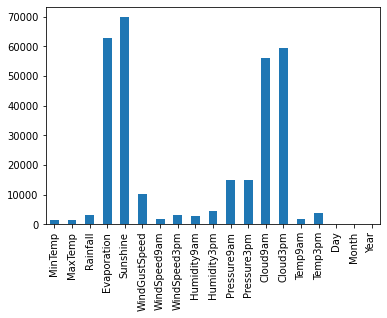

In [15]:
df[numerical].isnull().sum().plot.bar()
plt.show()



> Dalam kolom **Evaporation, Sunshine, Cloud9am, and Cloud3pm** adalah kolom tertinggi yang memiliki missing values pada data numerik. Jadi kita akan mengatasi missing value pada data numerik dengan **median**



In [16]:
for num_col in numerical:
    df[num_col].fillna(df[num_col].median(),inplace=True)

In [17]:
df[numerical].isnull().sum()/len(df)

MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustSpeed    0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
Day              0.0
Month            0.0
Year             0.0
dtype: float64

Selain itu, kita akan menghitung dan membuat plot missing value pada **categorical**

In [18]:
df[categorical].isnull().sum()

WindDir3pm      4228
WindGustDir    10326
WindDir9am     10566
Location           0
RainToday       3261
dtype: int64

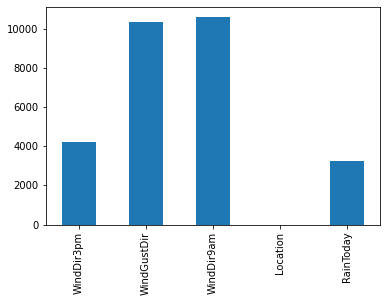

In [19]:
df[categorical].isnull().sum().plot.bar()
plt.show()



> Missing value paling tinggi dalam variabel kategoria dalah WindDir9am.



In [20]:
for cat_col in categorical:
    df[cat_col].fillna(df[cat_col].mode()[0],inplace=True)

Menegecek kembali apakah masih ada missing value

In [21]:
df.isnull().sum()/len(df)

Location         0.00000
MinTemp          0.00000
MaxTemp          0.00000
Rainfall         0.00000
Evaporation      0.00000
Sunshine         0.00000
WindGustDir      0.00000
WindGustSpeed    0.00000
WindDir9am       0.00000
WindDir3pm       0.00000
WindSpeed9am     0.00000
WindSpeed3pm     0.00000
Humidity9am      0.00000
Humidity3pm      0.00000
Pressure9am      0.00000
Pressure3pm      0.00000
Cloud9am         0.00000
Cloud3pm         0.00000
Temp9am          0.00000
Temp3pm          0.00000
RainToday        0.00000
RainTomorrow     0.02246
Day              0.00000
Month            0.00000
Year             0.00000
dtype: float64

In [22]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df.isnull().sum()/len(df)

Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
Day              0.0
Month            0.0
Year             0.0
dtype: float64

## Menangani Outliers

Outliers dari numerical data

In [23]:
df[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.185565,23.225365,2.326738,5.183213,7.994543,39.920123,13.992489,18.644279,68.858235,51.495742,1017.648460,1015.252481,4.649568,4.702658,16.985681,21.675977,15.715084,6.402544,2012.758926
std,6.388936,7.109617,8.426426,3.185401,2.762195,13.140632,8.851614,8.721688,18.932512,20.532227,6.746267,6.681810,2.294357,2.118753,6.472206,6.871243,8.798150,3.426506,2.541256
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,1.000000,1.000000,2007.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,8.000000,3.000000,2011.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,16.000000,6.000000,2013.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,23.000000,9.000000,2015.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,31.000000,12.000000,2017.000000


> Tabel menunjukkan bahwa variabel memiliki rentang yang cukup berbeda



Mari menggambar boxplot untuk memeriksa rentang data dan anomali.

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year'],
      dtype='object')


/home/jefl5/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jefl5/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jefl5/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jefl5/.local/

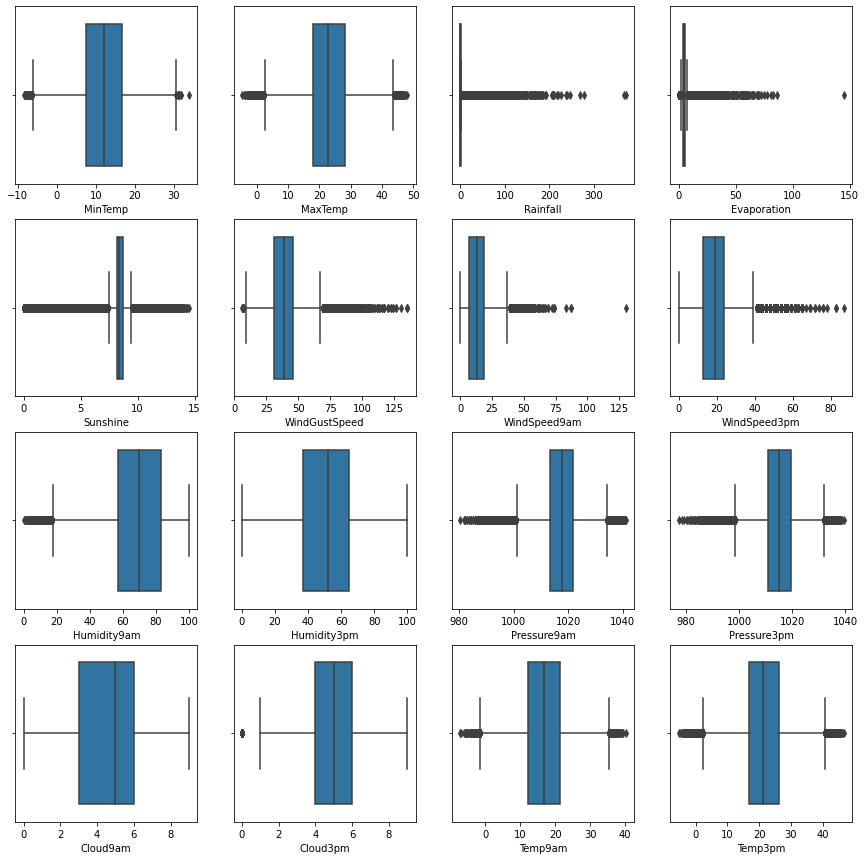

In [24]:
num_of_rows = 4
num_of_cols = 4
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(numerical)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(df[numerical[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.show()

In [25]:
lsUpper = []
lsLower = []
def removeOutliers(numerical):
    for i in range(len(numerical)):
        q1 = df[numerical[i]].quantile(0.25)
        q3 = df[numerical[i]].quantile(0.75)
        IQR = q3-q1
        minimum = q1 - 1.5 * IQR
        maximum = q3 + 1.5 * IQR
        df.loc[(df[numerical[i]] <= minimum), numerical[i]] = minimum
        df.loc[(df[numerical[i]] >= maximum), numerical[i]] = maximum  
removeOutliers(numerical)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year'],
      dtype='object')


/home/jefl5/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jefl5/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jefl5/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/jefl5/.local/

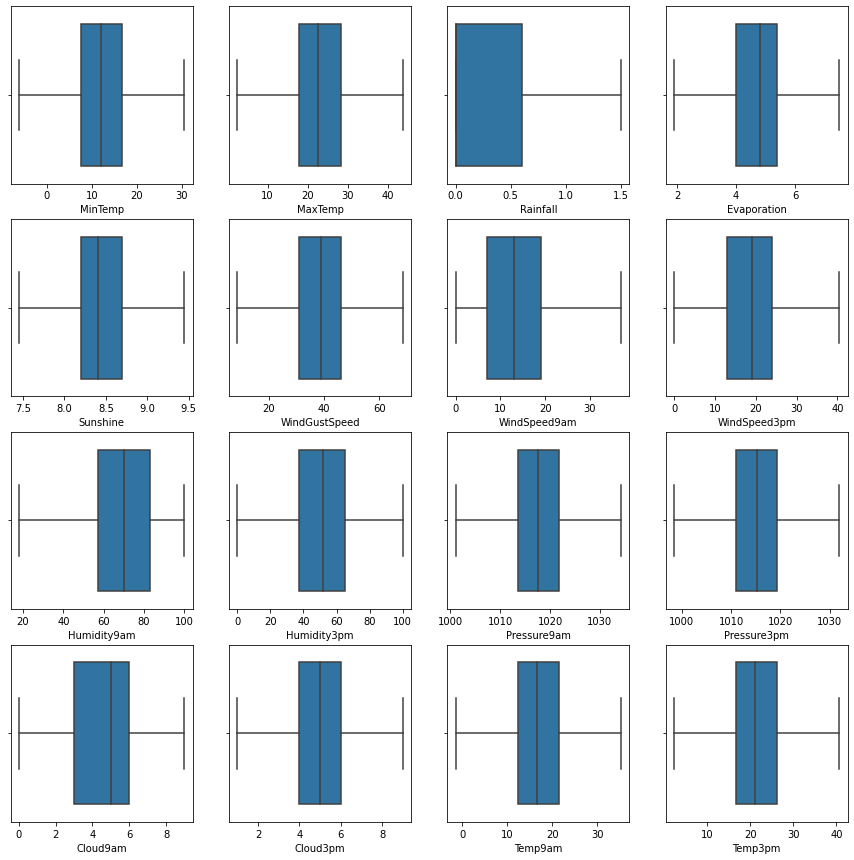

In [26]:
num_of_rows = 4
num_of_cols = 4
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(numerical)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(df[numerical[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.show()

/home/jefl5/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jefl5/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jefl5/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

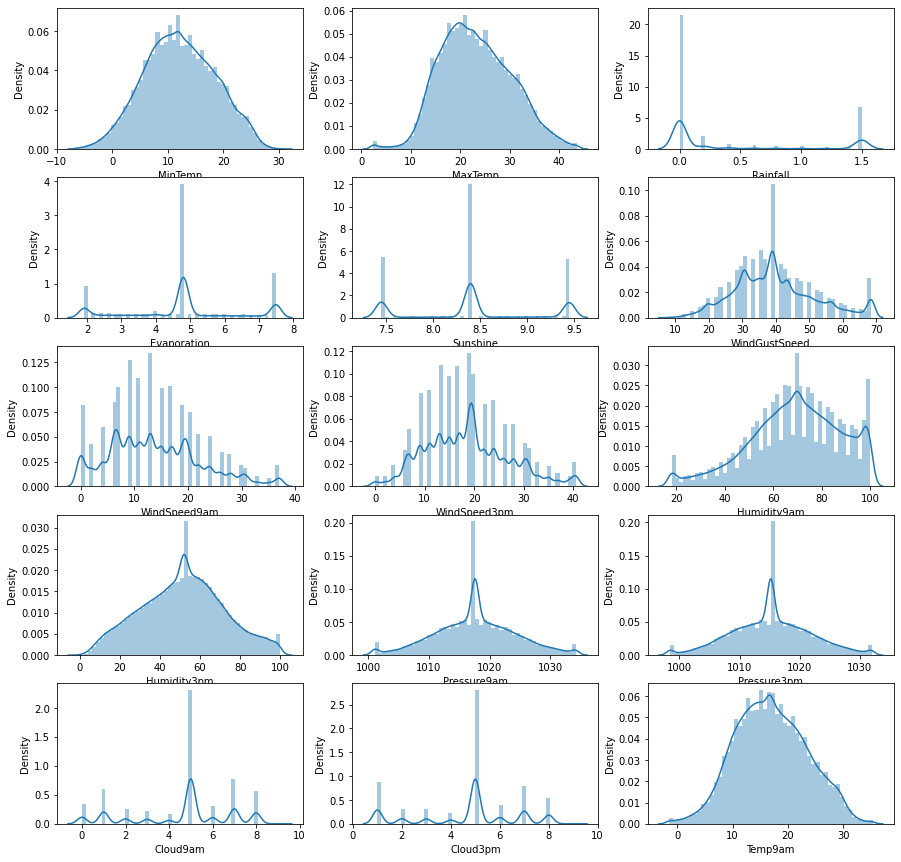

In [27]:
def plotHist():
    fig, ax =plt.subplots(5,3, figsize=(15,15))
    i=0;j=0;k=0
    while i<=4:
        while j<=2:
            sns.distplot(df[numerical[k]], ax=ax[i, j])
            j+=1;k+=1
        j=0;i+=1;
    plt.show()
plotHist()

> Kita dapat melihat pada beberpa kolom terdapat skewed



Melihat **Skewness, Mean, Median, dan Mode** pada setiap kolom numerikal

In [28]:
for i in numerical:
    print('Kolom' , i )
    print('Skewness :', df[i].skew())
    print('Mean     :', df[i].mean())
    print('Median   :', df[i].median())
    print('Mode     :', df[i].mode()[0])
    print('\n')

Kolom MinTemp
Skewness : 0.025028034260230907
Mean     : 12.18575035339292
Median   : 12.0
Mode     : 12.0


Kolom MaxTemp
Skewness : 0.23984287063636028
Mean     : 23.2285207429339
Median   : 22.6
Mode     : 22.6


Kolom Rainfall
Skewness : 1.1466454191676647
Mean     : 0.3854409148129655
Median   : 0.0
Mode     : 0.0


Kolom Evaporation
Skewness : -0.02134591003955598
Mean     : 4.795263479918138
Median   : 4.8
Mode     : 4.8


Kolom Sunshine
Skewness : 0.09788648821259652
Mean     : 8.42474910860591
Median   : 8.4
Mode     : 8.4


Kolom WindGustSpeed
Skewness : 0.45931354195218793
Mean     : 39.602786353758624
Median   : 39.0
Mode     : 39.0


Kolom WindSpeed9am
Skewness : 0.5104889655642089
Mean     : 13.903377803408045
Median   : 13.0
Mode     : 13.0


Kolom WindSpeed3pm
Skewness : 0.3987208821681616
Mean     : 18.557720844204706
Median   : 19.0
Mode     : 19.0


Kolom Humidity9am
Skewness : -0.43660525334399586
Mean     : 68.911015310177
Median   : 70.0
Mode     : 70.0


Kolom Hu

In [29]:
pd.set_option('display.max_columns', None)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No,1.0,12,2008
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No,2.0,12,2008
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No,3.0,12,2008
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No,4.0,12,2008
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,5.0,12,2008


# Explorasi Data

Pada part ini, kita akan melihat kolerasi tinggi antar variabel dengan correlation matrix

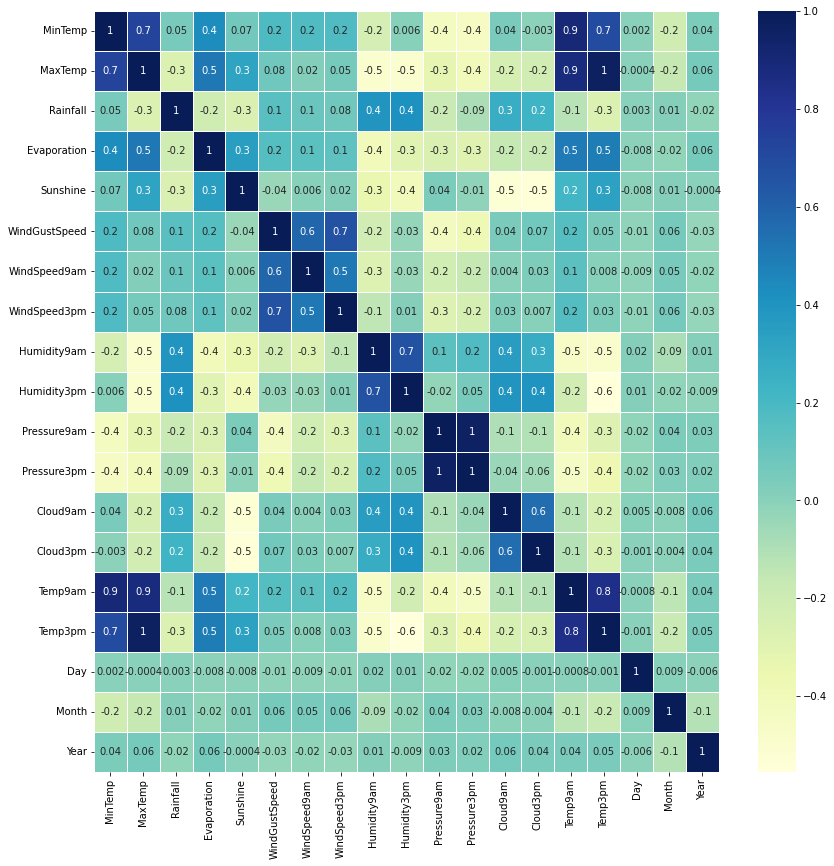

In [30]:
fig, ax = plt.subplots(figsize=(14,14))
cm = sns.heatmap(df.corr(), linewidths = .5, cmap="YlGnBu", annot=True, ax=ax, fmt='.1g')

> Seperti yang Anda lihat, ada korelasi sempurna antara **Pressure9am dan Pressure3pm**, yang berarti kedua variabel tersebut mewakili informasi yang sama. Oleh karena itu, saya akan menyingkirkan salah satu dari mereka, dalam hal ini, **Pressure3pm**



In [31]:
# df.drop(labels='Pressure3pm', axis = 1, inplace= True)
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

# Data Preprocessing

## Feature Engineering

Karena algoritma Machine learning memerlukan input dan variabel target menjadi **numerik**, jadi di bagian ini, kami akan mengubah nilai **categorical** kami menjadi nilai **numerik**

Kami akan menggunakan fungsi **LabelEncode** dari scikit-learn. Fungsi ini pada dasarnya memberikan nilai antara 0 dan jumlah kelas - 1.

In [32]:
categorical = ['WindDir3pm', 'WindGustDir', 'WindDir9am', 'Location', 'RainToday', 'RainTomorrow']

In [33]:
# value counting semua atribut berbentuk kategori
for key in categorical:
  print(df[key].value_counts().sort_values(),'\n')

NNE     6444
ENE     7724
NNW     7733
SSW     8010
NE      8164
E       8342
ESE     8382
NW      8468
WNW     8656
N       8667
SSE     9142
SW      9182
WSW     9329
S       9598
W       9911
SE     14441
Name: WindDir3pm, dtype: int64 

NNE     6433
NNW     6561
NE      7060
ESE     7305
ENE     7992
NW      8003
WNW     8066
SSW     8610
SW      8797
WSW     8901
S       8949
SSE     8993
N       9033
E       9071
SE      9309
W      19110
Name: WindGustDir, dtype: int64 

WSW     6843
WNW     7194
SSW     7448
NE      7527
ESE     7558
ENE     7735
NNW     7840
NNE     7948
SW      8237
W       8260
S       8493
NW      8552
SSE     8966
E       9024
SE      9162
N      21406
Name: WindDir9am, dtype: int64 

Uluru               1521
Katherine           1559
Nhil                1569
Melbourne           2435
Williamtown         2553
PearceRAAF          2762
Walpole             2819
Moree               2854
MountGinini         2907
BadgerysCreek       2928
NorahHead           2929
D

In [34]:
nom = ['Location','WindDir3pm','WindDir9am','WindGustDir']
ord = ['RainToday','RainTomorrow']

In [35]:
df = pd.get_dummies(data=df,columns=['Location','WindDir3pm','WindDir9am','WindGustDir'])
df = df.reindex(labels=df.columns, axis=1)

In [36]:
encoder = LabelEncoder()

df['RainToday'] = LabelEncoder().fit_transform(df['RainToday'])
df['RainTomorrow'] = LabelEncoder().fit_transform(df['RainTomorrow'])

In [37]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0,1.0,12,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0,2.0,12,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0,3.0,12,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0,4.0,12,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,5.0,12,2008,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [38]:
print(df.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW'],
      dtype='object', length=118)


## Feature scaling

In [39]:
rt = [i for i in df.columns if i != 'RainTomorrow']

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[rt] = scaler.fit_transform(df[rt])
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,0.190084,-0.046323,0.351559,0.002906,-0.036469,0.360385,0.712937,0.644267,0.111240,-1.436563,-1.514865,-1.246471,1.460297,0.128156,-0.013404,0.017781,-0.532962,0,-1.672526,1.633581,-1.872674,-0.149043,-0.147208,6.798861,-0.147582,-0.144999,-0.147507,-0.147656,-0.150784,-0.146509,-0.156939,-0.146509,-0.14563,-0.145378,-0.151538,-0.146308,-0.151441,-0.105288,-0.147507,-0.131996,-0.147034,-0.146984,-0.143117,-0.147557,-0.144467,-0.14568,-0.105629,-0.145024,-0.145906,-0.146859,-0.140745,-0.145906,-0.151563,-0.147034,-0.146709,-0.145579,-0.146809,-0.14568,-0.155023,-0.146934,-0.147631,-0.146759,-0.103983,-0.146208,-0.142219,-0.146784,-0.135214,-0.145604,-0.146383,-0.146559,-0.249646,-0.239668,-0.250281,-0.254772,-0.246804,-0.217876,-0.239816,-0.251643,-0.269046,-0.336213,-0.262127,-0.244325,-0.262739,-0.273721,3.927735,-0.264980,-0.260314,-0.239848,-0.236932,-0.420976,-0.236419,-0.243321,-0.241565,-0.252967,-0.252037,-0.262433,-0.25942,-0.235106,-0.247972,4.026742,-0.230845,-0.224851,-0.261037,-0.244034,-0.232715,-0.260453,-0.228571,-0.217681,-0.21994,-0.244212,-0.259157,-0.264676,-0.259837,-0.253879,-0.256801,2.537866,-0.245229,-0.258415
1,-0.749182,0.263885,-0.631552,0.002906,-0.036469,0.360385,-1.158097,0.407503,-1.326534,-1.290451,-1.074479,-1.139674,0.152737,0.128156,0.033005,0.383367,-0.532962,0,-1.558865,1.633581,-1.872674,-0.149043,-0.147208,6.798861,-0.147582,-0.144999,-0.147507,-0.147656,-0.150784,-0.146509,-0.156939,-0.146509,-0.14563,-0.145378,-0.151538,-0.146308,-0.151441,-0.105288,-0.147507,-0.131996,-0.147034,-0.146984,-0.143117,-0.147557,-0.144467,-0.14568,-0.105629,-0.145024,-0.145906,-0.146859,-0.140745,-0.145906,-0.151563,-0.147034,-0.146709,-0.145579,-0.146809,-0.14568,-0.155023,-0.146934,-0.147631,-0.146759,-0.103983,-0.146208,-0.142219,-0.146784,-0.135214,-0.145604,-0.146383,-0.146559,-0.249646,-0.239668,-0.250281,-0.254772,-0.246804,-0.217876,-0.239816,-0.251643,-0.269046,-0.336213,-0.262127,-0.244325,-0.262739,-0.273721,-0.254600,3.773863,-0.260314,-0.239848,-0.236932,-0.420976,-0.236419,-0.243321,4.139669,-0.252967,-0.252037,-0.262433,-0.25942,-0.235106,-0.247972,-0.248340,-0.230845,-0.224851,-0.261037,-0.244034,-0.2327

# Model

In [41]:
x = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [42]:
x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Day,Month,Year,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,0.190084,-0.046323,0.351559,0.002906,-0.036469,0.360385,0.712937,0.644267,0.111240,-1.436563,-1.514865,-1.246471,1.460297,0.128156,-0.013404,0.017781,-0.532962,-1.672526,1.633581,-1.872674,-0.149043,-0.147208,6.798861,-0.147582,-0.144999,-0.147507,-0.147656,-0.150784,-0.146509,-0.156939,-0.146509,-0.14563,-0.145378,-0.151538,-0.146308,-0.151441,-0.105288,-0.147507,-0.131996,-0.147034,-0.146984,-0.143117,-0.147557,-0.144467,-0.14568,-0.105629,-0.145024,-0.145906,-0.146859,-0.140745,-0.145906,-0.151563,-0.147034,-0.146709,-0.145579,-0.146809,-0.14568,-0.155023,-0.146934,-0.147631,-0.146759,-0.103983,-0.146208,-0.142219,-0.146784,-0.135214,-0.145604,-0.146383,-0.146559,-0.249646,-0.239668,-0.250281,-0.254772,-0.246804,-0.217876,-0.239816,-0.251643,-0.269046,-0.336213,-0.262127,-0.244325,-0.262739,-0.273721,3.927735,-0.264980,-0.260314,-0.239848,-0.236932,-0.420976,-0.236419,-0.243321,-0.241565,-0.252967,-0.252037,-0.262433,-0.25942,-0.235106,-0.247972,4.026742,-0.230845,-0.224851,-0.261037,-0.244034,-0.232715,-0.260453,-0.228571,-0.217681,-0.21994,-0.244212,-0.259157,-0.264676,-0.259837,-0.253879,-0.256801,2.537866,-0.245229,-0.258415
1,-0.749182,0.263885,-0.631552,0.002906,-0.036469,0.360385,-1.158097,0.407503,-1.326534,-1.290451,-1.074479,-1.139674,0.152737,0.128156,0.033005,0.383367,-0.532962,-1.558865,1.633581,-1.872674,-0.149043,-0.147208,6.798861,-0.147582,-0.144999,-0.147507,-0.147656,-0.150784,-0.146509,-0.156939,-0.146509,-0.14563,-0.145378,-0.151538,-0.146308,-0.151441,-0.105288,-0.147507,-0.131996,-0.147034,-0.146984,-0.143117,-0.147557,-0.144467,-0.14568,-0.105629,-0.145024,-0.145906,-0.146859,-0.140745,-0.145906,-0.151563,-0.147034,-0.146709,-0.145579,-0.146809,-0.14568,-0.155023,-0.146934,-0.147631,-0.146759,-0.103983,-0.146208,-0.142219,-0.146784,-0.135214,-0.145604,-0.146383,-0.146559,-0.249646,-0.239668,-0.250281,-0.254772,-0.246804,-0.217876,-0.239816,-0.251643,-0.269046,-0.336213,-0.262127,-0.244325,-0.262739,-0.273721,-0.254600,3.773863,-0.260314,-0.239848,-0.236932,-0.420976,-0.236419,-0.243321,4.139669,-0.252967,-0.252037,-0.262433,-0.25942,-0.235106,-0.247972,-0.248340,-0.230845,-0.224851,-0.261037,-0.244034,-0.232715,-0.260453,-0.2

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size=0.3, random_state=5)

## Logistic Regression

In [44]:
LogR = LogisticRegression(solver='lbfgs')
LogR.fit(X_train, y_train)

pred1 = LogR.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred1))
print(classification_report(y_test, pred1))

Accuracy Score: 0.8483988935252473
              precision    recall  f1-score   support

           0       0.87      0.94      0.91     33095
           1       0.73      0.52      0.60      9563

    accuracy                           0.85     42658
   macro avg       0.80      0.73      0.76     42658
weighted avg       0.84      0.85      0.84     42658



In [45]:
cfm_lg = confusion_matrix(y_test, pred1)
cfm_lg

array([[31259,  1836],
       [ 4631,  4932]])

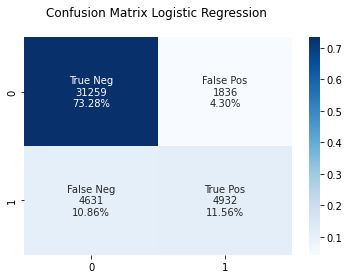

In [46]:
group_names        = ['True Neg','False Pos','False Neg','True Pos']
group_counts       = ['{0:0.0f}'.format(value) for value in cfm_lg.flatten()]
group_percentages  = ['{0:.2%}'.format(value) for value in cfm_lg.flatten()/np.sum(cfm_lg)]
labels             = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels             = np.asarray(labels).reshape(2,2)
ax                 = sns.heatmap(cfm_lg/np.sum(cfm_lg), annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix Logistic Regression \n');

plt.show()

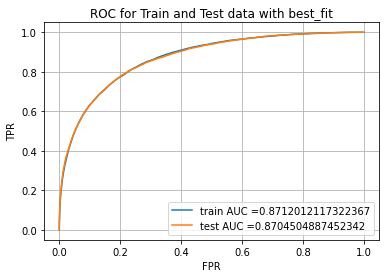

In [47]:
train_fpr, train_tpr, thresholds     = roc_curve(y_train, LogR.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds       = roc_curve(y_test, LogR.predict_proba(X_test)[:,1])
plt.plot(train_fpr, train_tpr, label = "train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label   = "test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC for Train and Test data with best_fit")
plt.grid()
plt.show()

## Decision Tree

In [48]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

pred2  = dtree.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred2))
print(classification_report(y_test, pred2))

Accuracy Score: 0.7909653523371935
              precision    recall  f1-score   support

           0       0.87      0.86      0.87     33095
           1       0.53      0.54      0.53      9563

    accuracy                           0.79     42658
   macro avg       0.70      0.70      0.70     42658
weighted avg       0.79      0.79      0.79     42658



In [49]:
cm_dtree          = confusion_matrix(y_test, pred2)
cm_dtree

array([[28618,  4477],
       [ 4440,  5123]])

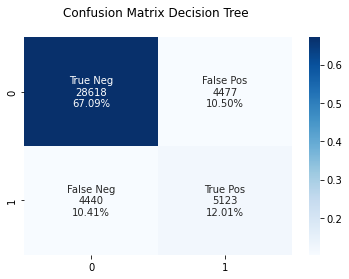

In [50]:
group_names        = ['True Neg','False Pos','False Neg','True Pos']
group_counts       = ['{0:0.0f}'.format(value) for value in cm_dtree.flatten()]
group_percentages  = ['{0:.2%}'.format(value) for value in cm_dtree.flatten()/np.sum(cfm_lg)]
labels             = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels             = np.asarray(labels).reshape(2,2)
ax                 = sns.heatmap(cm_dtree/np.sum(cm_dtree), annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix Decision Tree \n');

plt.show()

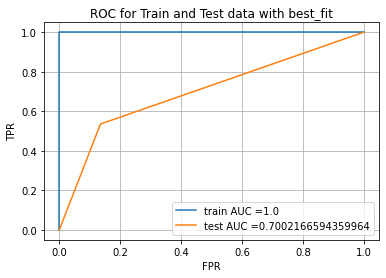

In [51]:
train_fpr, train_tpr, thresholds     = roc_curve(y_train, dtree.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds       = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
plt.plot(train_fpr, train_tpr, label = "train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label   = "test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC for Train and Test data with best_fit")
plt.grid()
plt.show()

## Random Forest

In [52]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

pred3  = random_forest.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred3))
print(classification_report(y_test, pred3))

Accuracy Score: 0.8546345351399504
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     33095
           1       0.78      0.49      0.60      9563

    accuracy                           0.85     42658
   macro avg       0.82      0.72      0.76     42658
weighted avg       0.85      0.85      0.84     42658



In [53]:
cm_random_forest  = confusion_matrix(y_test, pred3)
cm_random_forest

array([[31788,  1307],
       [ 4894,  4669]])

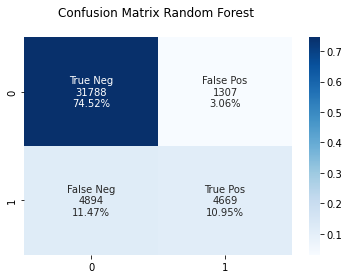

In [54]:
group_names        = ['True Neg','False Pos','False Neg','True Pos']
group_counts       = ['{0:0.0f}'.format(value) for value in cm_random_forest.flatten()]
group_percentages  = ['{0:.2%}'.format(value) for value in cm_random_forest.flatten()/np.sum(cm_random_forest)]
labels             = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels             = np.asarray(labels).reshape(2,2)
ax                 = sns.heatmap(cm_random_forest/np.sum(cm_random_forest), annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix Random Forest \n');

plt.show()

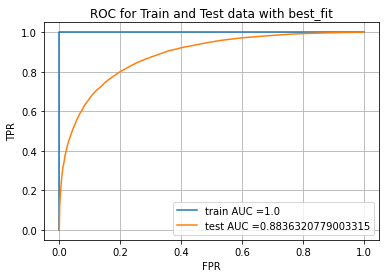

In [55]:
train_fpr, train_tpr, thresholds     = roc_curve(y_train, random_forest.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds       = roc_curve(y_test, random_forest.predict_proba(X_test)[:,1])
plt.plot(train_fpr, train_tpr, label = "train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label   = "test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC for Train and Test data with best_fit")
plt.grid()
plt.show()

## XGBoost

In [56]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

pred4  = xgb.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, pred4))
print(classification_report(y_test, pred4))


/home/jefl5/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/jefl5/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[11:31:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 0.859135449388157
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     33095
           1       0.75      0.56      0.64      9563

    accuracy                           0.86     42658
   macro avg       0.82      0.75      0.78     42658
weighted avg       0.85      0.86      0.85     42658



In [57]:
cm_xgb  = confusion_matrix(y_test, pred4)
cm_xgb

array([[31307,  1788],
       [ 4221,  5342]])

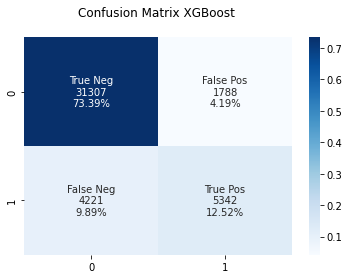

In [58]:
group_names        = ['True Neg','False Pos','False Neg','True Pos']
group_counts       = ['{0:0.0f}'.format(value) for value in cm_xgb.flatten()]
group_percentages  = ['{0:.2%}'.format(value) for value in cm_xgb.flatten()/np.sum(cm_xgb)]
labels             = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels             = np.asarray(labels).reshape(2,2)
ax                 = sns.heatmap(cm_xgb/np.sum(cm_xgb), annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix XGBoost \n');

plt.show()

/home/jefl5/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/home/jefl5/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


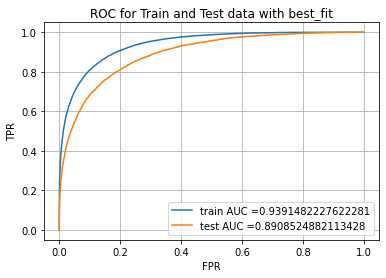

In [59]:
train_fpr, train_tpr, thresholds     = roc_curve(y_train, xgb.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds       = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
plt.plot(train_fpr, train_tpr, label = "train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label   = "test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC for Train and Test data with best_fit")
plt.grid()
plt.show()

## SVM

In [61]:
SVM = svm.SVC()
SVM.fit(X_train, y_train)

SVC()

In [62]:
pred5 = SVM.predict(X_test)

In [63]:
print("Accuracy Score   :", accuracy_score(y_test, pred5))
print(classification_report(y_test, pred5))

Accuracy Score   : 0.8619250785315767
              precision    recall  f1-score   support

           0       0.88      0.96      0.91     33095
           1       0.78      0.53      0.63      9563

    accuracy                           0.86     42658
   macro avg       0.83      0.74      0.77     42658
weighted avg       0.86      0.86      0.85     42658



In [64]:
cfm_svm = confusion_matrix(y_test, pred5)
cfm_svm

array([[31699,  1396],
       [ 4494,  5069]])

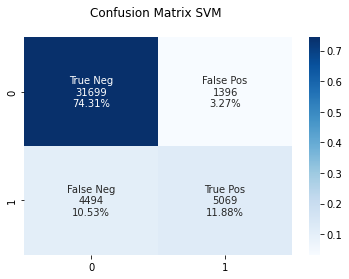

In [65]:
group_names        = ['True Neg','False Pos','False Neg','True Pos']
group_counts       = ['{0:0.0f}'.format(value) for value in cfm_svm.flatten()]
group_percentages  = ['{0:.2%}'.format(value) for value in cfm_svm.flatten()/np.sum(cfm_svm)]
labels             = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels             = np.asarray(labels).reshape(2,2)
ax                 = sns.heatmap(cfm_svm/np.sum(cfm_svm), annot=labels, fmt='', cmap='Blues')
ax.set_title('Confusion Matrix SVM \n');

plt.show()

# Evaluasi Model

In [66]:
# kesimpulan akurasi
akurasi = {"Model": ["Logistic Regression", "Decission Tree", "Random Forest","XGBoost","SVM"],
"Accuracy"   : [accuracy_score(y_test, pred1)*100, accuracy_score(y_test, pred2)*100, 
                accuracy_score(y_test, pred3)*100, accuracy_score(y_test, pred4)*100, 
                accuracy_score(y_test, pred5)*100],
"Precession" : [precision_score(y_test, pred1)*100, precision_score(y_test, pred2)*100,
                precision_score(y_test, pred3)*100, precision_score(y_test, pred4)*100,
                precision_score(y_test, pred5)*100],
"Recall"     : [recall_score(y_test, pred1)*100, recall_score(y_test, pred2)*100,
                recall_score(y_test, pred3)*100, recall_score(y_test, pred4)*100,
                recall_score(y_test, pred5)*100],
"F1-Score"   : [f1_score(y_test, pred1)*100, f1_score(y_test, pred2)*100,
                f1_score(y_test, pred3)*100, f1_score(y_test, pred4)*100,
                f1_score(y_test, pred5)*100]
          }

tabel_akurasi = pd.DataFrame(akurasi).sort_values('Accuracy')
print('Ringkasan Evaluasi Model')
display(tabel_akurasi)

Ringkasan Evaluasi Model


,Model,Accuracy,Precession,Recall,F1-Score
1,Decission Tree,79.096535,53.364583,53.571055,53.467620
0,Logistic Regression,84.839889,72.872340,51.573774,60.400465
2,Random Forest,85.463454,78.129183,48.823591,60.093957
3,XGBoost,85.913545,74.922861,55.861131,64.002875
4,SVM,86.192508,78.406806,53.006379,63.251809


Text(0.5, 1.0, 'Ringkasan Evaluasi Model')

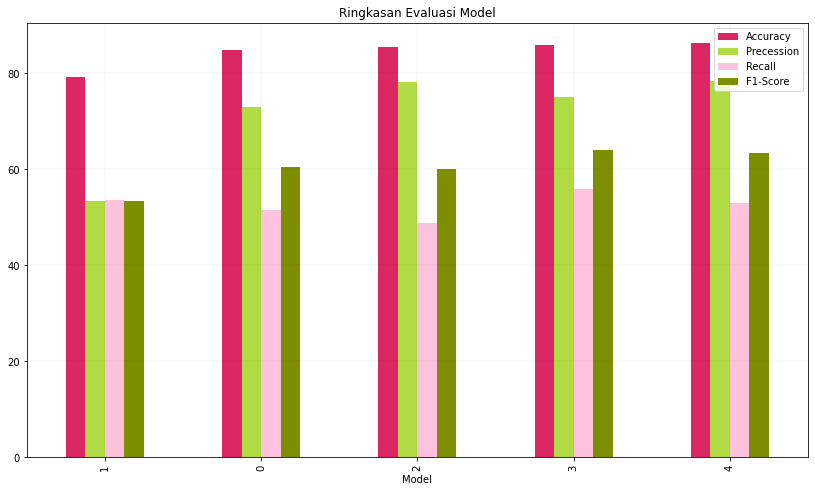

In [67]:
tabel_akurasi.plot(kind='bar', figsize=(14,8), color=['#db2763','#b0db43','#ffc2de',"#7e8e01"])
plt.grid(color='black', linestyle='-', linewidth=0.2, alpha=0.2)
plt.xlabel('Model')
plt.title('Ringkasan Evaluasi Model')

> Dalam ringkasan evaluasi model terlihat bahwa model yang mempunyai akurasi paling tinggi adalah model SVM dengan nilai 85,8%. disusul oleh model XGBoost 85.7%, model Logistic Regression 84.5%, model Random Forest 85.2% dan model dengan akurasi terendah yaitu Decision Tree yaitu 78.5%.
> Dengan melihat nilai akurasi, precission, dan recall maka model SVM adalah model yang paling bagus yaitu nilai Accuracy sebesar 85.8%, Precession sebesar 77,7%, Recall sebesar 51.91, F1-Score 62.2%

In [68]:
pickle.dump(LogR , open('model_classifier-LogR.pkl','wb'))

In [69]:
pickle.dump(SVM , open('model_classifier-svm_model.pkl','wb'))